### OLS (Ordinary Least Square) Task  

#### 서울 자전거 대여 수 분석

- Date: 대여 날짜
- Rented Bike Count: 대여 수
- Hour: 대여 시간
- Temperature(°C): 온도(섭씨)
- Humidity(%): 습도 (%)
- Wind speed (m/s): 풍속 (m/s)
- Visibility (10m): 가시거리 (10m)
- Dew point temperature(°C): 이슬점(°C), 이슬점이 낮으면 10~15°C 정도로 공기가 편안하게 느껴진다.
- Solar Radiation (MJ/m2): 태양복사 (MJ/m2)
- Rainfall(mm): 강우량/비 (mm)
- Snowfall (cm): 강우량/눈 (cm)
- Seasons: 계절
- Holiday: 공휴일
- Functioning Day: 운영 여부

In [90]:
import pandas as pd
import chardet

rawdata = open('./datasets/seoul_bicycle.csv', 'rb').read()
result = chardet.detect(rawdata)
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [139]:
a = pd.read_csv('./datasets/seoul_bicycle.csv', encoding='ISO-8859-1')
a

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [140]:
from sklearn.preprocessing import LabelEncoder

# a = a.copy()
columns = ['Holiday','Functioning Day']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(a[column])
    label_encoders[column] = encoder.classes_
    a[column] = result

# label_encoders

In [73]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# sparse를 False로 설정하면 넘파이 배열, True는 희소 행렬
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(a[['Seasons']])

a = pd.concat([a, 
                      pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], 
                     axis=1)
a

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,"(Autumn,)","(Spring,)","(Summer,)","(Winter,)"
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,1,1,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,1,1,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,1,1,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,1,1,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,1,1,1,0,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,1,1,1,0,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,1,1,1,0,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,1,1,1,0,0,0


In [141]:
a['Rented Bike Count'] = a.pop('Rented Bike Count')
a = a.drop(labels=['Date', 'Seasons'], axis=1)
a

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,712


In [142]:
a.columns = ['Hour', 
                    'Temperature', 
                    'Humidity', 
                    'Wind_speed', 
                    'Visibility', 
                    'Dew_point_temperature', 
                    'Solar_Radiation', 
                    'Rainfall', 
                    'Snowfall',
                    'Holiday', 
                    'Functioning_Day', 
                    # 'Autumn', 
                    # 'Spring', 
                    # 'Summer',
                    # 'Winter',
                     'target']

a

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,target
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,173
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,107
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1,1,1003
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,1,1,764
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,1,1,694
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,1,1,712


array([[<Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>,
        <Axes: title={'center': 'Humidity(%)'}>],
       [<Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>,
        <Axes: title={'center': 'Dew point temperature(°C)'}>],
       [<Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>,
        <Axes: title={'center': 'Snowfall (cm)'}>],
       [<Axes: title={'center': 'Rented Bike Count'}>, <Axes: >,
        <Axes: >]], dtype=object)

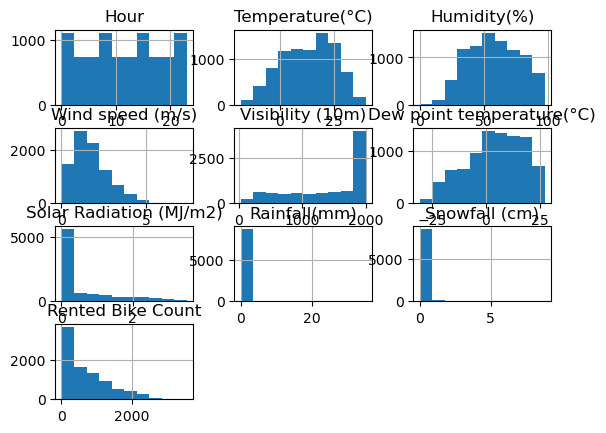

In [16]:
a.hist()

In [122]:
a.corr()['target'].sort_values(ascending=False)[1:]

Temperature              0.538558
Hour                     0.410257
Dew_point_temperature    0.379788
Solar_Radiation          0.261837
Functioning_Day          0.203943
Visibility               0.199280
Holiday                  0.072338
Rainfall                -0.123074
Humidity                -0.199780
Name: target, dtype: float64

<Axes: >

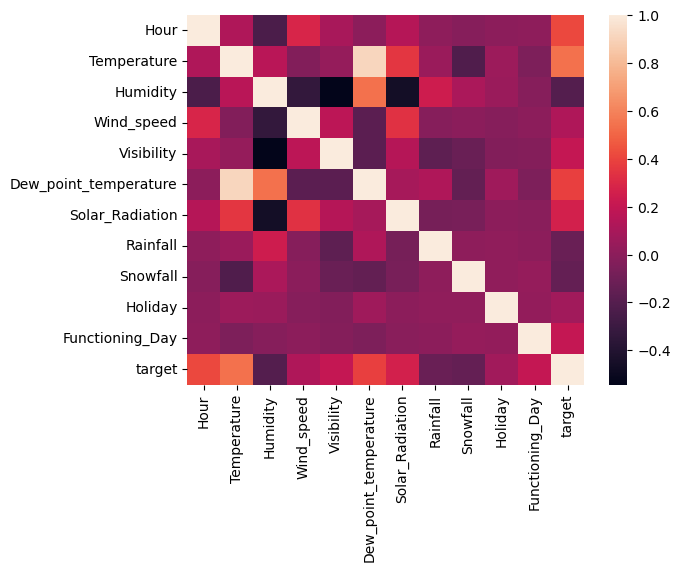

In [113]:
import seaborn as sns

sns.heatmap(a.corr())

In [160]:
import statsmodels.api as sm

features, targets = a.iloc[:, :-1], a['target']

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              4727.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:46:12   Log-Likelihood:                         -66810.
No. Observations:                8760   AIC:                                  1.336e+05
Df Residuals:                    8755   BIC:                                  1.337e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [157]:
# a = a.drop(labels=['Autumn', 'Visibility'], axis=1)
# a

a = a.drop(labels=['Rainfall' ], axis=1)
a

# a = a.drop(labels=['Snowfall'], axis=1)
# a
# a = a.drop(labels=['Functioning Day', 'Visibility (10m)'], axis=1)
# a

,Hour,Humidity,Visibility,Dew_point_temperature,Solar_Radiation,target
0,0,37,2000,-17.6,0.0,254
1,1,38,2000,-17.6,0.0,204
2,2,39,2000,-17.7,0.0,173
3,3,40,2000,-17.6,0.0,107
4,4,36,2000,-18.6,0.0,78
...,...,...,...,...,...,...
8755,19,34,1894,-10.3,0.0,1003
8756,20,37,2000,-9.9,0.0,764
8757,21,39,1968,-9.9,0.0,694
8758,22,41,1859,-9.8,0.0,712


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [159]:
display(feature_engineering_VIF(features))

,score,feature
0,3.465393,Hour
1,4.310273,Humidity
2,4.505612,Visibility
3,1.447612,Dew_point_temperature
4,1.629134,Solar_Radiation


In [100]:
a = a.drop(labels=['Functioning_Day', 'Holiday', 'Dew_point_temperature', 'Visibility', 'Humidity', 'Temperature'], axis=1)
a

,Hour,Solar_Radiation,Rainfall,target
0,0,0.0,0.0,254
1,1,0.0,0.0,204
2,2,0.0,0.0,173
3,3,0.0,0.0,107
4,4,0.0,0.0,78
...,...,...,...,...
8755,19,0.0,0.0,1003
8756,20,0.0,0.0,764
8757,21,0.0,0.0,694
8758,22,0.0,0.0,712


In [102]:
a.target.value_counts()

target
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: count, Length: 2166, dtype: int64

In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = a.iloc[:, :-1], a.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)


# for i, feature_name in enumerate(X_train.columns):
    # print('{} 피쳐의 계수: {:.4f}'.format(feature_name, l_r.coef_[i]))


# print(l_r.intercept_)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))

W: 27.6709, b: 1200.2689


In [162]:
from sklearn.metrics import mean_squared_error

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), 
      np.sqrt(mean_squared_error(y_test, prediction))))

MSE loss: 232992.6208, RMSE loss: 482.6931
